In [ ]:
TASK 2

STOCK PREDICTION

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [9]:
#load csv

stockData = pd.read_csv('C:/Users/DHRUVI/Downloads/tesla-stock-price.csv')
stockData

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.8800,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.2800,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.9900,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.2500,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.5100,247.7700
...,...,...,...,...,...,...
752,2015/10/21,210.09,4177956.0000,211.99,214.8100,208.8000
753,2015/10/20,213.03,14877020.0000,227.72,228.6000,202.0000
754,2015/10/19,228.10,2506836.0000,226.50,231.1500,224.9400
755,2015/10/16,227.01,4327574.0000,223.04,230.4805,222.8700


In [15]:
x = stockData.iloc[:,1:4].values
x

array([[270.49, '4,787,699', 264.5],
       [259.59, '6189026.0000', 259.06],
       [258.78, '7189257.0000', 261.0],
       ...,
       [228.1, '2506836.0000', 226.5],
       [227.01, '4327574.0000', 223.04],
       [221.31, '2835920.0000', 216.43]], dtype=object)

In [16]:
y = stockData.iloc[:,4].values
y

array([273.88  , 263.28  , 261.99  , 262.25  , 265.51  , 266.77  ,
       267.7599, 274.88  , 294.    , 304.6   , 316.84  , 311.44  ,
       278.    , 314.96  , 313.89  , 304.6   , 302.9993, 300.58  ,
       305.98  , 300.    , 302.64  , 300.87  , 297.3256, 295.    ,
       292.5   , 282.    , 286.03  , 268.35  , 291.17  , 286.78  ,
       298.19  , 305.3082, 304.6   , 311.85  , 318.88  , 322.435 ,
       323.85  , 327.32  , 323.88  , 324.79  , 308.5   , 326.77  ,
       342.28  , 344.49  , 359.1995, 363.19  , 360.    , 367.01  ,
       382.64  , 387.46  , 354.98  , 355.    , 349.99  , 303.    ,
       298.32  , 296.1   , 307.6933, 310.7   , 309.62  , 307.7171,
       305.5   , 323.24  , 323.54  , 325.5   , 324.74  , 315.16  ,
       319.5849, 323.23  , 321.94  , 327.6771, 318.52  , 312.07  ,
       314.39  , 332.49  , 364.78  , 353.86  , 357.02  , 350.79  ,
       343.55  , 338.47  , 352.25  , 366.2139, 364.38  , 370.    ,
       373.73  , 364.67  , 358.75  , 347.2   , 354.97  , 334.6

In [18]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(close_price)
scaled_close

array([[0.5255045 ],
       [0.48033813],
       [0.47698173],
       [0.44984047],
       [0.46910869],
       [0.49363941],
       [0.44292048],
       [0.49011727],
       [0.5724941 ],
       [0.62623793],
       [0.65201177],
       [0.69212282],
       [0.50180251],
       [0.67894584],
       [0.68748187],
       [0.65188746],
       [0.64645921],
       [0.64405586],
       [0.64086521],
       [0.64372436],
       [0.58546389],
       [0.62640368],
       [0.62789541],
       [0.60411055],
       [0.60858575],
       [0.56259064],
       [0.58770149],
       [0.49546264],
       [0.56884764],
       [0.56797746],
       [0.60199727],
       [0.65466374],
       [0.66083786],
       [0.66854515],
       [0.69692952],
       [0.72763436],
       [0.74234451],
       [0.73107363],
       [0.73745494],
       [0.7385323 ],
       [0.68275805],
       [0.67057556],
       [0.79467948],
       [0.80810508],
       [0.84519123],
       [0.88153151],
       [0.87771931],
       [0.865

In [19]:
# Split the data into training and testing sets
train_size = int(len(scaled_close) * 0.8)
test_size = len(scaled_close) - train_size
train_data, test_data = scaled_close[0:train_size,:], scaled_close[train_size:len(scaled_close),:]

train_size

605

In [20]:
test_size

152

In [21]:
train_data

array([[0.5255045 ],
       [0.48033813],
       [0.47698173],
       [0.44984047],
       [0.46910869],
       [0.49363941],
       [0.44292048],
       [0.49011727],
       [0.5724941 ],
       [0.62623793],
       [0.65201177],
       [0.69212282],
       [0.50180251],
       [0.67894584],
       [0.68748187],
       [0.65188746],
       [0.64645921],
       [0.64405586],
       [0.64086521],
       [0.64372436],
       [0.58546389],
       [0.62640368],
       [0.62789541],
       [0.60411055],
       [0.60858575],
       [0.56259064],
       [0.58770149],
       [0.49546264],
       [0.56884764],
       [0.56797746],
       [0.60199727],
       [0.65466374],
       [0.66083786],
       [0.66854515],
       [0.69692952],
       [0.72763436],
       [0.74234451],
       [0.73107363],
       [0.73745494],
       [0.7385323 ],
       [0.68275805],
       [0.67057556],
       [0.79467948],
       [0.80810508],
       [0.84519123],
       [0.88153151],
       [0.87771931],
       [0.865

In [22]:
test_data

array([[0.3006257 ],
       [0.31744914],
       [0.29644056],
       [0.2797    ],
       [0.25272449],
       [0.26776613],
       [0.26494841],
       [0.26358099],
       [0.27054241],
       [0.26942361],
       [0.27037666],
       [0.29528032],
       [0.28119173],
       [0.32689678],
       [0.36733933],
       [0.40662164],
       [0.40231219],
       [0.43111093],
       [0.44669125],
       [0.45609746],
       [0.44814155],
       [0.4561389 ],
       [0.43351428],
       [0.4404757 ],
       [0.42970207],
       [0.45667758],
       [0.45928811],
       [0.4483073 ],
       [0.45937099],
       [0.43156673],
       [0.44026851],
       [0.44089007],
       [0.47043467],
       [0.50449592],
       [0.46326607],
       [0.42812746],
       [0.38917665],
       [0.35677288],
       [0.34483902],
       [0.35826462],
       [0.3588033 ],
       [0.3484026 ],
       [0.32697965],
       [0.37529524],
       [0.39220155],
       [0.36907968],
       [0.34272573],
       [0.324

In [23]:
# Define a function to create input and output sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Set the sequence length
seq_length = 10

In [24]:
# Generate sequences for training and testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train

array([[[0.5255045 ],
        [0.48033813],
        [0.47698173],
        ...,
        [0.49011727],
        [0.5724941 ],
        [0.62623793]],

       [[0.48033813],
        [0.47698173],
        [0.44984047],
        ...,
        [0.5724941 ],
        [0.62623793],
        [0.65201177]],

       [[0.47698173],
        [0.44984047],
        [0.46910869],
        ...,
        [0.62623793],
        [0.65201177],
        [0.69212282]],

       ...,

       [[0.31127502],
        [0.35507397],
        [0.38059918],
        ...,
        [0.31446567],
        [0.32967306],
        [0.32888576]],

       [[0.35507397],
        [0.38059918],
        [0.3674222 ],
        ...,
        [0.32967306],
        [0.32888576],
        [0.33750466]],

       [[0.38059918],
        [0.3674222 ],
        [0.31910662],
        ...,
        [0.32888576],
        [0.33750466],
        [0.31454854]]])

In [25]:
y_train

array([[0.65201177],
       [0.69212282],
       [0.50180251],
       [0.67894584],
       [0.68748187],
       [0.65188746],
       [0.64645921],
       [0.64405586],
       [0.64086521],
       [0.64372436],
       [0.58546389],
       [0.62640368],
       [0.62789541],
       [0.60411055],
       [0.60858575],
       [0.56259064],
       [0.58770149],
       [0.49546264],
       [0.56884764],
       [0.56797746],
       [0.60199727],
       [0.65466374],
       [0.66083786],
       [0.66854515],
       [0.69692952],
       [0.72763436],
       [0.74234451],
       [0.73107363],
       [0.73745494],
       [0.7385323 ],
       [0.68275805],
       [0.67057556],
       [0.79467948],
       [0.80810508],
       [0.84519123],
       [0.88153151],
       [0.87771931],
       [0.86512245],
       [0.9392533 ],
       [0.97749969],
       [0.82177931],
       [0.84738739],
       [0.85306427],
       [0.6512659 ],
       [0.6400779 ],
       [0.60705258],
       [0.63609995],
       [0.675

In [26]:
X_test

array([[[0.3006257 ],
        [0.31744914],
        [0.29644056],
        ...,
        [0.26358099],
        [0.27054241],
        [0.26942361]],

       [[0.31744914],
        [0.29644056],
        [0.2797    ],
        ...,
        [0.27054241],
        [0.26942361],
        [0.27037666]],

       [[0.29644056],
        [0.2797    ],
        [0.25272449],
        ...,
        [0.26942361],
        [0.27037666],
        [0.29528032]],

       ...,

       [[0.2905565 ],
        [0.26213069],
        [0.2816061 ],
        ...,
        [0.28197903],
        [0.2752248 ],
        [0.28740728]],

       [[0.26213069],
        [0.2816061 ],
        [0.28711723],
        ...,
        [0.2752248 ],
        [0.28740728],
        [0.3498529 ]],

       [[0.2816061 ],
        [0.28711723],
        [0.27630216],
        ...,
        [0.28740728],
        [0.3498529 ],
        [0.34533626]]])

In [27]:
y_test

array([[0.27037666],
       [0.29528032],
       [0.28119173],
       [0.32689678],
       [0.36733933],
       [0.40662164],
       [0.40231219],
       [0.43111093],
       [0.44669125],
       [0.45609746],
       [0.44814155],
       [0.4561389 ],
       [0.43351428],
       [0.4404757 ],
       [0.42970207],
       [0.45667758],
       [0.45928811],
       [0.4483073 ],
       [0.45937099],
       [0.43156673],
       [0.44026851],
       [0.44089007],
       [0.47043467],
       [0.50449592],
       [0.46326607],
       [0.42812746],
       [0.38917665],
       [0.35677288],
       [0.34483902],
       [0.35826462],
       [0.3588033 ],
       [0.3484026 ],
       [0.32697965],
       [0.37529524],
       [0.39220155],
       [0.36907968],
       [0.34272573],
       [0.32428625],
       [0.30941035],
       [0.29619194],
       [0.2644926 ],
       [0.25487921],
       [0.26954792],
       [0.24418846],
       [0.25533502],
       [0.23772428],
       [0.21576265],
       [0.185

In [28]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\DHRUVI\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

history

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0027 - val_loss: 0.0017
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - val_loss: 0.0017
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_loss: 0.0017
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0029 - val_loss: 0.0019


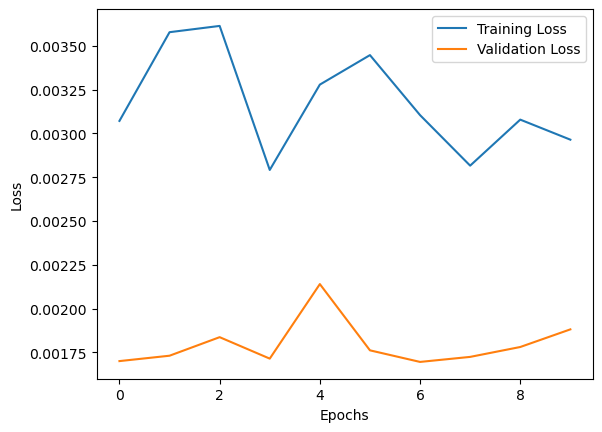

In [32]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

predicted_stock_price

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


array([[210.04594],
       [210.35544],
       [211.9866 ],
       [213.06941],
       [216.19167],
       [221.87187],
       [229.79929],
       [236.65266],
       [243.19666],
       [248.9787 ],
       [253.61357],
       [256.1044 ],
       [257.64774],
       [256.9944 ],
       [256.15662],
       [254.77966],
       [255.30894],
       [256.66403],
       [257.31747],
       [258.2359 ],
       [257.16385],
       [256.1522 ],
       [255.43245],
       [256.96317],
       [261.28592],
       [262.87225],
       [260.643  ],
       [254.97322],
       [247.43832],
       [240.36894],
       [236.04018],
       [233.94424],
       [232.70518],
       [230.83978],
       [231.86882],
       [234.8197 ],
       [236.4971 ],
       [235.65266],
       [232.86818],
       [229.07687],
       [225.0001 ],
       [219.99315],
       [215.21925],
       [212.37483],
       [209.62468],
       [208.0388 ],
       [206.3223 ],
       [203.73238],
       [199.7006 ],
       [195.40948],


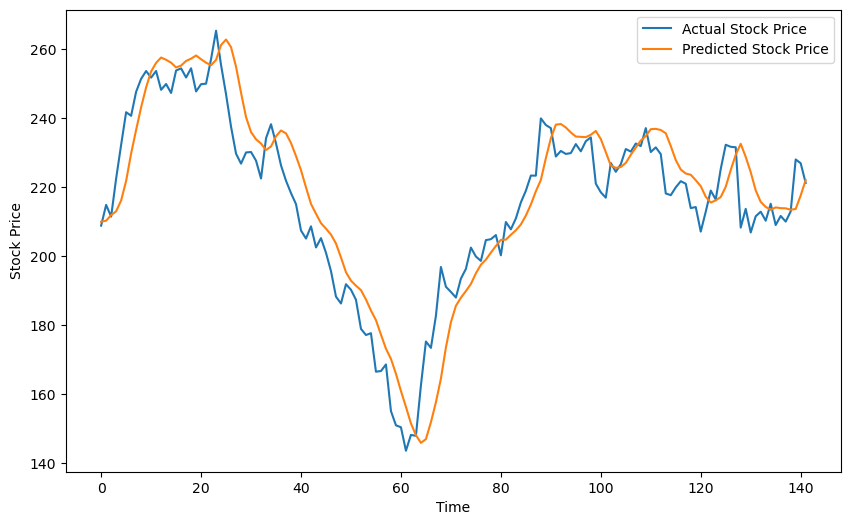

In [34]:
# Plot the actual and predicted stock prices
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(test_data[seq_length:]), label='Actual Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()